# CRIMES IN INDIA


In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.combine import SMOTEENN
from sklearn import svm
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import metrics
from collections import Counter
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

# PHASE 1(EDA ANALYSIS)

In [2]:
df=pd.read_excel("Desktop\\Internship Training\\CAPSTONE PROJECT\\India_Crime\\State wise data.xlsx")
df

,States and Union Territories,Total population in thousands,Poverty rate in percentage,Literacy Rate in percentage_Male,Literacy Rate in percentage_Female,Literacy rate in percentage,Sex ratio,Density of Population_Per sqr. Km,SOCIAL SECTOR EXPENDITURE,Per Capita Net state Income,INFANT MORTALITY RATE,Gender Vulnerability Index scores,Crime rate share in percentage,Expenditure on Education in percentage,UNEMPLOYMENT RATE
0,Andhra Pradesh,84581,9.20,74.9,59.1,67.0,993,308,391.3,69000,34,0.569,2.9,22.89,12
1,Arunachal Pradesh,1384,34.67,72.6,57.7,65.4,938,17,15.7,73068,36,0.452,0.1,12.18,17
2,Assam,31206,31.98,77.8,66.3,72.2,958,398,102.4,41142,44,0.483,2.4,26.08,45
3,Bihar,104099,33.74,71.2,51.5,61.8,918,1106,193.7,21750,38,0.410,5.2,23.14,32
4,Chandigarh,1055,21.81,90.0,81.2,86.0,818,9258,180.0,159116,14,0.430,0.1,22.05,36
5,Chhattisgarh,25545,39.93,80.3,60.2,70.3,991,189,118.2,55177,39,0.547,1.9,23.56,8
6,Delhi,16788,9.91,90.9,80.8,86.2,868,11320,108.1,185361,18,0.436,5.2,20.96,78
7,Goa,1459,5.09,92.6,84.7,88.7,973,394,20.9,259444,8,0.649,0.1,19.50,51
8,Gujarat,60440,16.63,85.8,69.7,78.0,919,308,285.9,87481,30,0.543,7.7,23.12,3
9,Haryana,25351,11.16,84.1,65.9,75.6,879,573,136.4,106085,33,0.516,3.8,22.54,24


In [3]:
df.columns

Index(['States and Union Territories', 'Total population in thousands',
       ' Poverty rate in percentage', 'Literacy Rate in percentage_Male',
       'Literacy Rate in percentage_Female', ' Literacy rate in percentage',
       'Sex ratio', ' Density of Population_Per sqr. Km',
       ' SOCIAL SECTOR EXPENDITURE', 'Per Capita Net state Income',
       'INFANT MORTALITY RATE', 'Gender Vulnerability Index scores',
       'Crime rate share in percentage',
       'Expenditure on Education in percentage', 'UNEMPLOYMENT RATE'],
      dtype='object')

In [5]:
df.head()

,States and Union Territories,Total population in thousands,Poverty rate in percentage,Literacy Rate in percentage_Male,Literacy Rate in percentage_Female,Literacy rate in percentage,Sex ratio,Density of Population_Per sqr. Km,SOCIAL SECTOR EXPENDITURE,Per Capita Net state Income,INFANT MORTALITY RATE,Gender Vulnerability Index scores,Crime rate share in percentage,Expenditure on Education in percentage,UNEMPLOYMENT RATE
0,Andhra Pradesh,84581,9.20,74.9,59.1,67.0,993,308,391.3,69000,34,0.569,2.9,22.89,12
1,Arunachal Pradesh,1384,34.67,72.6,57.7,65.4,938,17,15.7,73068,36,0.452,0.1,12.18,17
2,Assam,31206,31.98,77.8,66.3,72.2,958,398,102.4,41142,44,0.483,2.4,26.08,45
3,Bihar,104099,33.74,71.2,51.5,61.8,918,1106,193.7,21750,38,0.410,5.2,23.14,32
4,Chandigarh,1055,21.81,90.0,81.2,86.0,818,9258,180.0,159116,14,0.430,0.1,22.05,36


In [7]:
# to check for the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   States and Union Territories            31 non-null     object 
 1   Total population in thousands           31 non-null     int64  
 2    Poverty rate in percentage             31 non-null     float64
 3   Literacy Rate in percentage_Male        31 non-null     float64
 4   Literacy Rate in percentage_Female      31 non-null     float64
 5    Literacy rate in percentage            31 non-null     float64
 6   Sex ratio                               31 non-null     int64  
 7    Density of Population_Per sqr. Km      31 non-null     int64  
 8    SOCIAL SECTOR EXPENDITURE              31 non-null     float64
 9   Per Capita Net state Income             31 non-null     int64  
 10  INFANT MORTALITY RATE                   31 non-null     int64  


In [8]:
df.isnull()

,States and Union Territories,Total population in thousands,Poverty rate in percentage,Literacy Rate in percentage_Male,Literacy Rate in percentage_Female,Literacy rate in percentage,Sex ratio,Density of Population_Per sqr. Km,SOCIAL SECTOR EXPENDITURE,Per Capita Net state Income,INFANT MORTALITY RATE,Gender Vulnerability Index scores,Crime rate share in percentage,Expenditure on Education in percentage,UNEMPLOYMENT RATE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull

<bound method DataFrame.isnull of    States and Union Territories  Total population in thousands  \
0                Andhra Pradesh                          84581   
1             Arunachal Pradesh                           1384   
2                         Assam                          31206   
3                         Bihar                         104099   
4                    Chandigarh                           1055   
5                  Chhattisgarh                          25545   
6                         Delhi                          16788   
7                           Goa                           1459   
8                       Gujarat                          60440   
9                       Haryana                          25351   
10             Himachal Pradesh                           6865   
11            Jammu and Kashmir                          12541   
12                    Jharkhand                          32988   
13                    Karnataka           

In [12]:
df.dtypes

States and Union Territories               object
Total population in thousands               int64
 Poverty rate in percentage               float64
Literacy Rate in percentage_Male          float64
Literacy Rate in percentage_Female        float64
 Literacy rate in percentage              float64
Sex ratio                                   int64
 Density of Population_Per sqr. Km          int64
 SOCIAL SECTOR EXPENDITURE                float64
Per Capita Net state Income                 int64
INFANT MORTALITY RATE                       int64
Gender Vulnerability Index scores         float64
Crime rate share in percentage            float64
Expenditure on Education in percentage    float64
UNEMPLOYMENT RATE                           int64
dtype: object

In [13]:
df.nunique()

States and Union Territories              31
Total population in thousands             31
 Poverty rate in percentage               31
Literacy Rate in percentage_Male          30
Literacy Rate in percentage_Female        30
 Literacy rate in percentage              31
Sex ratio                                 29
 Density of Population_Per sqr. Km        29
 SOCIAL SECTOR EXPENDITURE                31
Per Capita Net state Income               31
INFANT MORTALITY RATE                     24
Gender Vulnerability Index scores         29
Crime rate share in percentage            22
Expenditure on Education in percentage    30
UNEMPLOYMENT RATE                         25
dtype: int64

In [14]:
df.describe()

,Total population in thousands,Poverty rate in percentage,Literacy Rate in percentage_Male,Literacy Rate in percentage_Female,Literacy rate in percentage,Sex ratio,Density of Population_Per sqr. Km,SOCIAL SECTOR EXPENDITURE,Per Capita Net state Income,INFANT MORTALITY RATE,Gender Vulnerability Index scores,Crime rate share in percentage,Expenditure on Education in percentage,UNEMPLOYMENT RATE
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,39026.516129,19.159032,83.580645,69.925806,76.941935,947.709677,1075.322581,155.577419,82899.000000,27.096774,0.531032,3.141935,21.192258,29.064516
std,45408.916224,10.786666,6.578066,10.858084,8.407289,52.422764,2519.914699,147.279217,50947.355367,11.782345,0.065362,3.625812,4.116602,32.452977
min,611.000000,5.090000,71.200000,51.500000,61.800000,818.000000,17.000000,10.600000,21750.000000,8.000000,0.410000,0.000000,10.100000,3.000000
25%,2911.500000,10.130000,78.250000,59.700000,69.800000,918.500000,160.500000,21.250000,49956.500000,17.500000,0.483000,0.100000,19.615000,9.000000
50%,25545.000000,16.630000,82.800000,70.500000,76.300000,950.000000,319.000000,118.200000,69000.000000,25.000000,0.530000,1.900000,21.910000,20.000000
75%,64821.500000,30.540000,88.950000,76.000000,82.550000,977.500000,564.000000,231.200000,98738.000000,38.000000,0.582500,5.050000,23.130000,29.500000
max,199812.000000,39.930000,96.100000,92.100000,94.000000,1084.000000,11320.000000,538.300000,259444.000000,47.000000,0.649000,11.500000,28.900000,151.000000


In [15]:
# checking for null values
df.isnull().sum()

States and Union Territories              0
Total population in thousands             0
 Poverty rate in percentage               0
Literacy Rate in percentage_Male          0
Literacy Rate in percentage_Female        0
 Literacy rate in percentage              0
Sex ratio                                 0
 Density of Population_Per sqr. Km        0
 SOCIAL SECTOR EXPENDITURE                0
Per Capita Net state Income               0
INFANT MORTALITY RATE                     0
Gender Vulnerability Index scores         0
Crime rate share in percentage            0
Expenditure on Education in percentage    0
UNEMPLOYMENT RATE                         0
dtype: int64

In [18]:
df.shape

(31, 15)

In [24]:
df['Crime rate share in percentage'].value_counts

<bound method IndexOpsMixin.value_counts of 0      2.9
1      0.1
2      2.4
3      5.2
4      0.1
5      1.9
6      5.2
7      0.1
8      7.7
9      3.8
10     0.4
11     0.5
12     1.1
13     3.2
14    10.1
15     8.0
16    10.2
17     0.1
18     0.1
19     0.0
20     0.0
21     2.1
22     0.1
23     1.4
24     4.9
25     0.0
26     9.8
27     0.1
28    11.5
29     0.7
30     3.7
Name: Crime rate share in percentage, dtype: float64>

<AxesSubplot:>

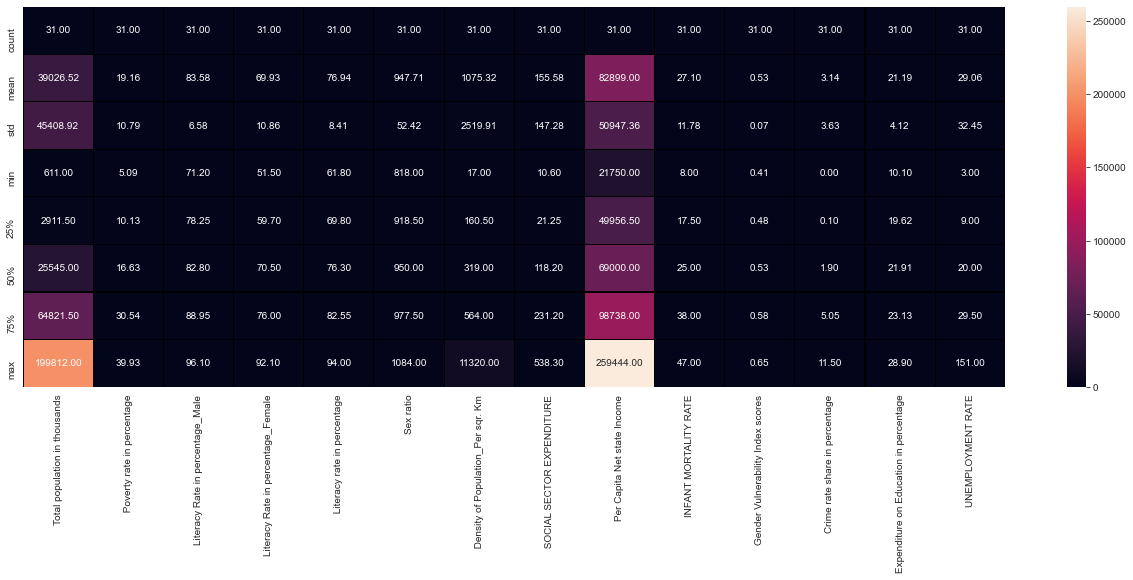

In [29]:
# visualization of describe data using heatmap
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(), annot=True, linewidths=0.1, linecolor='black',fmt="0.2f")

In [32]:
# using correlation technique
df.corr()['Crime rate share in percentage']

Total population in thousands             0.784986
 Poverty rate in percentage               0.020690
Literacy Rate in percentage_Male         -0.002033
Literacy Rate in percentage_Female       -0.124067
 Literacy rate in percentage             -0.077031
Sex ratio                                 0.050011
 Density of Population_Per sqr. Km        0.018343
 SOCIAL SECTOR EXPENDITURE                0.796246
Per Capita Net state Income              -0.124615
INFANT MORTALITY RATE                     0.160168
Gender Vulnerability Index scores        -0.130193
Crime rate share in percentage            1.000000
Expenditure on Education in percentage    0.361112
UNEMPLOYMENT RATE                        -0.164101
Name: Crime rate share in percentage, dtype: float64

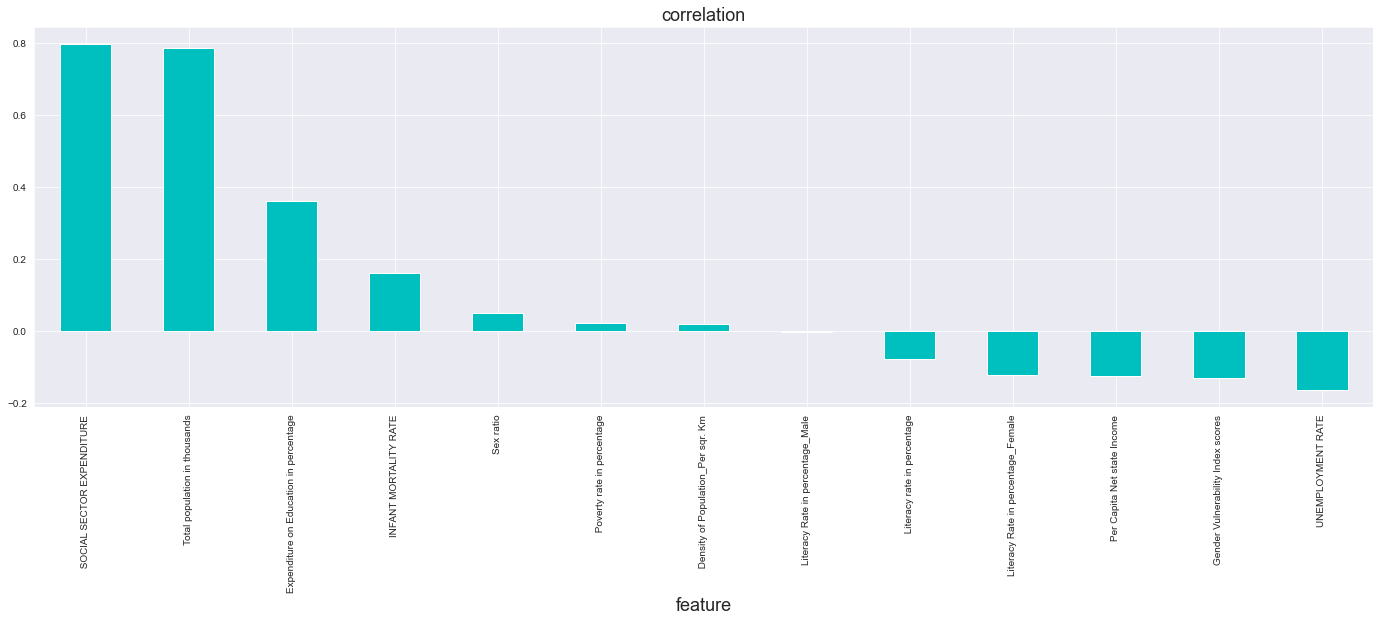

In [36]:
# using barplot to check correlation value
plt.figure(figsize=(24,7))
df.corr()['Crime rate share in percentage'].sort_values(ascending=False).drop(['Crime rate share in percentage']).plot(kind='bar',color='c')
plt.xlabel('feature', fontsize=18)
plt.title('correlation', fontsize=18)
plt.show()

In [38]:
# checking crime rate statewise
df.groupby('States and Union Territories')['Crime rate share in percentage'].mean()

States and Union Territories
Andhra Pradesh        2.9
Arunachal Pradesh     0.1
Assam                 2.4
Bihar                 5.2
Chandigarh            0.1
Chhattisgarh          1.9
Delhi                 5.2
Goa                   0.1
Gujarat               7.7
Haryana               3.8
Himachal Pradesh      0.4
Jammu and Kashmir     0.5
Jharkhand             1.1
Karnataka             3.2
Kerala               10.1
Madhya Pradesh        8.0
Maharashtra          10.2
Manipur               0.1
Meghalaya             0.1
Mizoram               0.0
Nagaland              0.0
Odisha                2.1
Puducherry            0.1
Punjab                1.4
Rajasthan             4.9
Sikkim                0.0
Tamil Nadu            9.8
Tripura               0.1
Uttar Pradesh        11.5
Uttarakhand           0.7
West Bengal           3.7
Name: Crime rate share in percentage, dtype: float64

In [41]:
#Crime Rate based on States
df.groupby('States and Union Territories')['Crime rate share in percentage'].value_counts()

States and Union Territories  Crime rate share in percentage
Andhra Pradesh                2.9                               1
Arunachal Pradesh             0.1                               1
Assam                         2.4                               1
Bihar                         5.2                               1
Chandigarh                    0.1                               1
Chhattisgarh                  1.9                               1
Delhi                         5.2                               1
Goa                           0.1                               1
Gujarat                       7.7                               1
Haryana                       3.8                               1
Himachal Pradesh              0.4                               1
Jammu and Kashmir             0.5                               1
Jharkhand                     1.1                               1
Karnataka                     3.2                               1
Kerala         

In [48]:
#Literacy rate based on states
df.groupby('States and Union Territories')['Literacy Rate in percentage_Male'].value_counts()

States and Union Territories  Literacy Rate in percentage_Male
Andhra Pradesh                74.9                                1
Arunachal Pradesh             72.6                                1
Assam                         77.8                                1
Bihar                         71.2                                1
Chandigarh                    90.0                                1
Chhattisgarh                  80.3                                1
Delhi                         90.9                                1
Goa                           92.6                                1
Gujarat                       85.8                                1
Haryana                       84.1                                1
Himachal Pradesh              89.5                                1
Jammu and Kashmir             76.8                                1
Jharkhand                     76.8                                1
Karnataka                     82.5                   

In [49]:
#Literacy rate based on states
df.groupby('States and Union Territories')['Literacy Rate in percentage_Female'].value_counts()

States and Union Territories  Literacy Rate in percentage_Female
Andhra Pradesh                59.1                                  1
Arunachal Pradesh             57.7                                  1
Assam                         66.3                                  1
Bihar                         51.5                                  1
Chandigarh                    81.2                                  1
Chhattisgarh                  60.2                                  1
Delhi                         80.8                                  1
Goa                           84.7                                  1
Gujarat                       69.7                                  1
Haryana                       65.9                                  1
Himachal Pradesh              75.9                                  1
Jammu and Kashmir             56.4                                  1
Jharkhand                     55.4                                  1
Karnataka                

In [50]:
#Crime rate vs Literacy rate of female
df.groupby('Crime rate share in percentage')['Literacy Rate in percentage_Female'].value_counts()

Crime rate share in percentage  Literacy Rate in percentage_Female
0.0                             75.6                                  1
                                76.1                                  1
                                89.3                                  1
0.1                             57.7                                  1
                                72.4                                  1
                                72.9                                  1
                                80.7                                  1
                                81.2                                  1
                                82.7                                  1
                                84.7                                  1
0.4                             75.9                                  1
0.5                             56.4                                  1
0.7                             70.0                                 

In [51]:
#Crime rate vs Literacy rate of male
df.groupby('Crime rate share in percentage')['Literacy Rate in percentage_Male'].value_counts()

Crime rate share in percentage  Literacy Rate in percentage_Male
0.0                             82.8                                1
                                86.6                                1
                                93.3                                1
0.1                             72.6                                1
                                76.0                                1
                                86.1                                1
                                90.0                                1
                                91.3                                1
                                91.5                                1
                                92.6                                1
0.4                             89.5                                1
0.5                             76.8                                1
0.7                             87.4                                1
1.1                      

In [53]:
# checking the numerical and categorical columns
numeric_col=list(df.select_dtypes(include=np.number).columns)

categorical_col=list(df.select_dtypes(include=object).columns)

In [54]:
numeric_col

['Total population in thousands',
 ' Poverty rate in percentage',
 'Literacy Rate in percentage_Male',
 'Literacy Rate in percentage_Female',
 ' Literacy rate in percentage',
 'Sex ratio',
 ' Density of Population_Per sqr. Km',
 ' SOCIAL SECTOR EXPENDITURE',
 'Per Capita Net state Income',
 'INFANT MORTALITY RATE',
 'Gender Vulnerability Index scores',
 'Crime rate share in percentage',
 'Expenditure on Education in percentage',
 'UNEMPLOYMENT RATE']

In [55]:
categorical_col

['States and Union Territories']

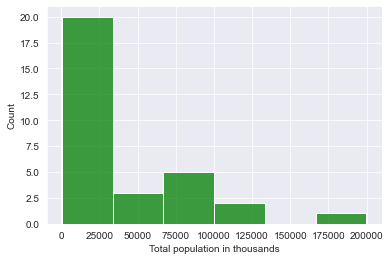

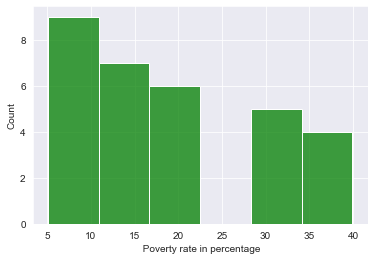

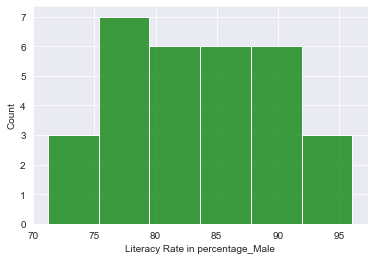

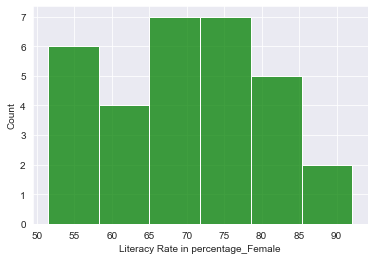

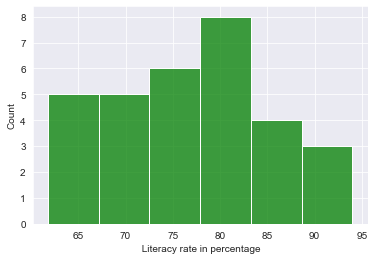

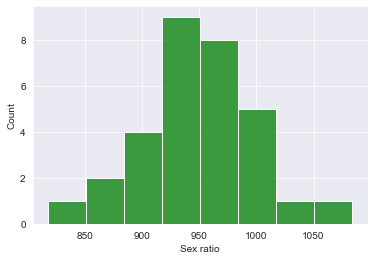

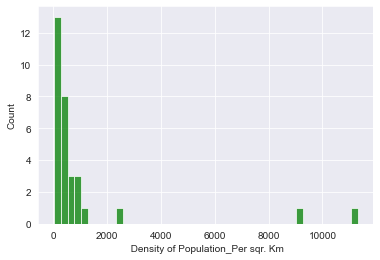

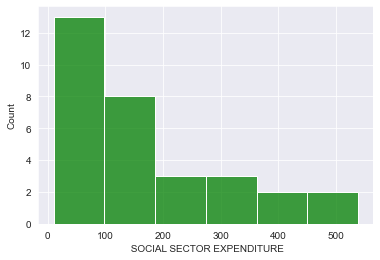

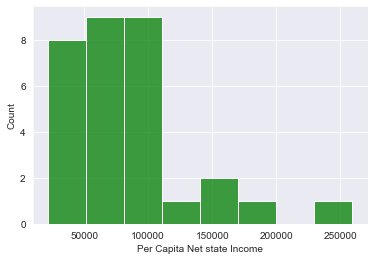

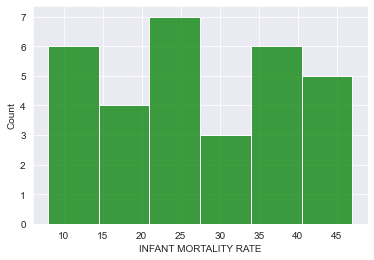

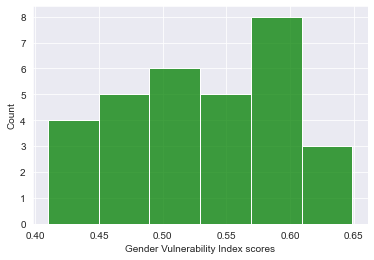

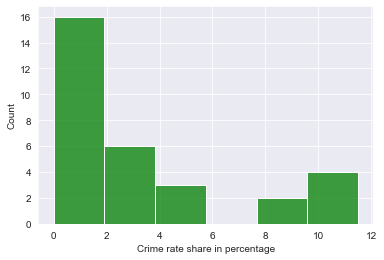

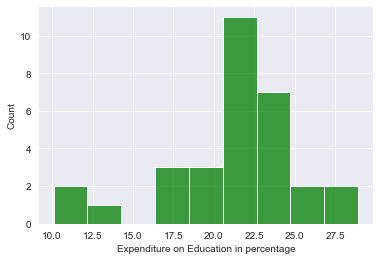

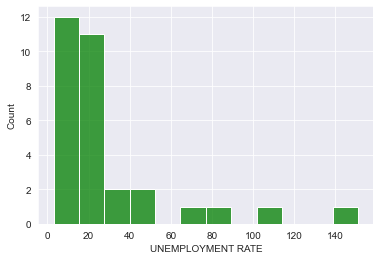

In [56]:
# visualizing numeric data
for col in numeric_col:
    sns.histplot(x=df[col], palette='PuBu', color='green')
    plt.show()

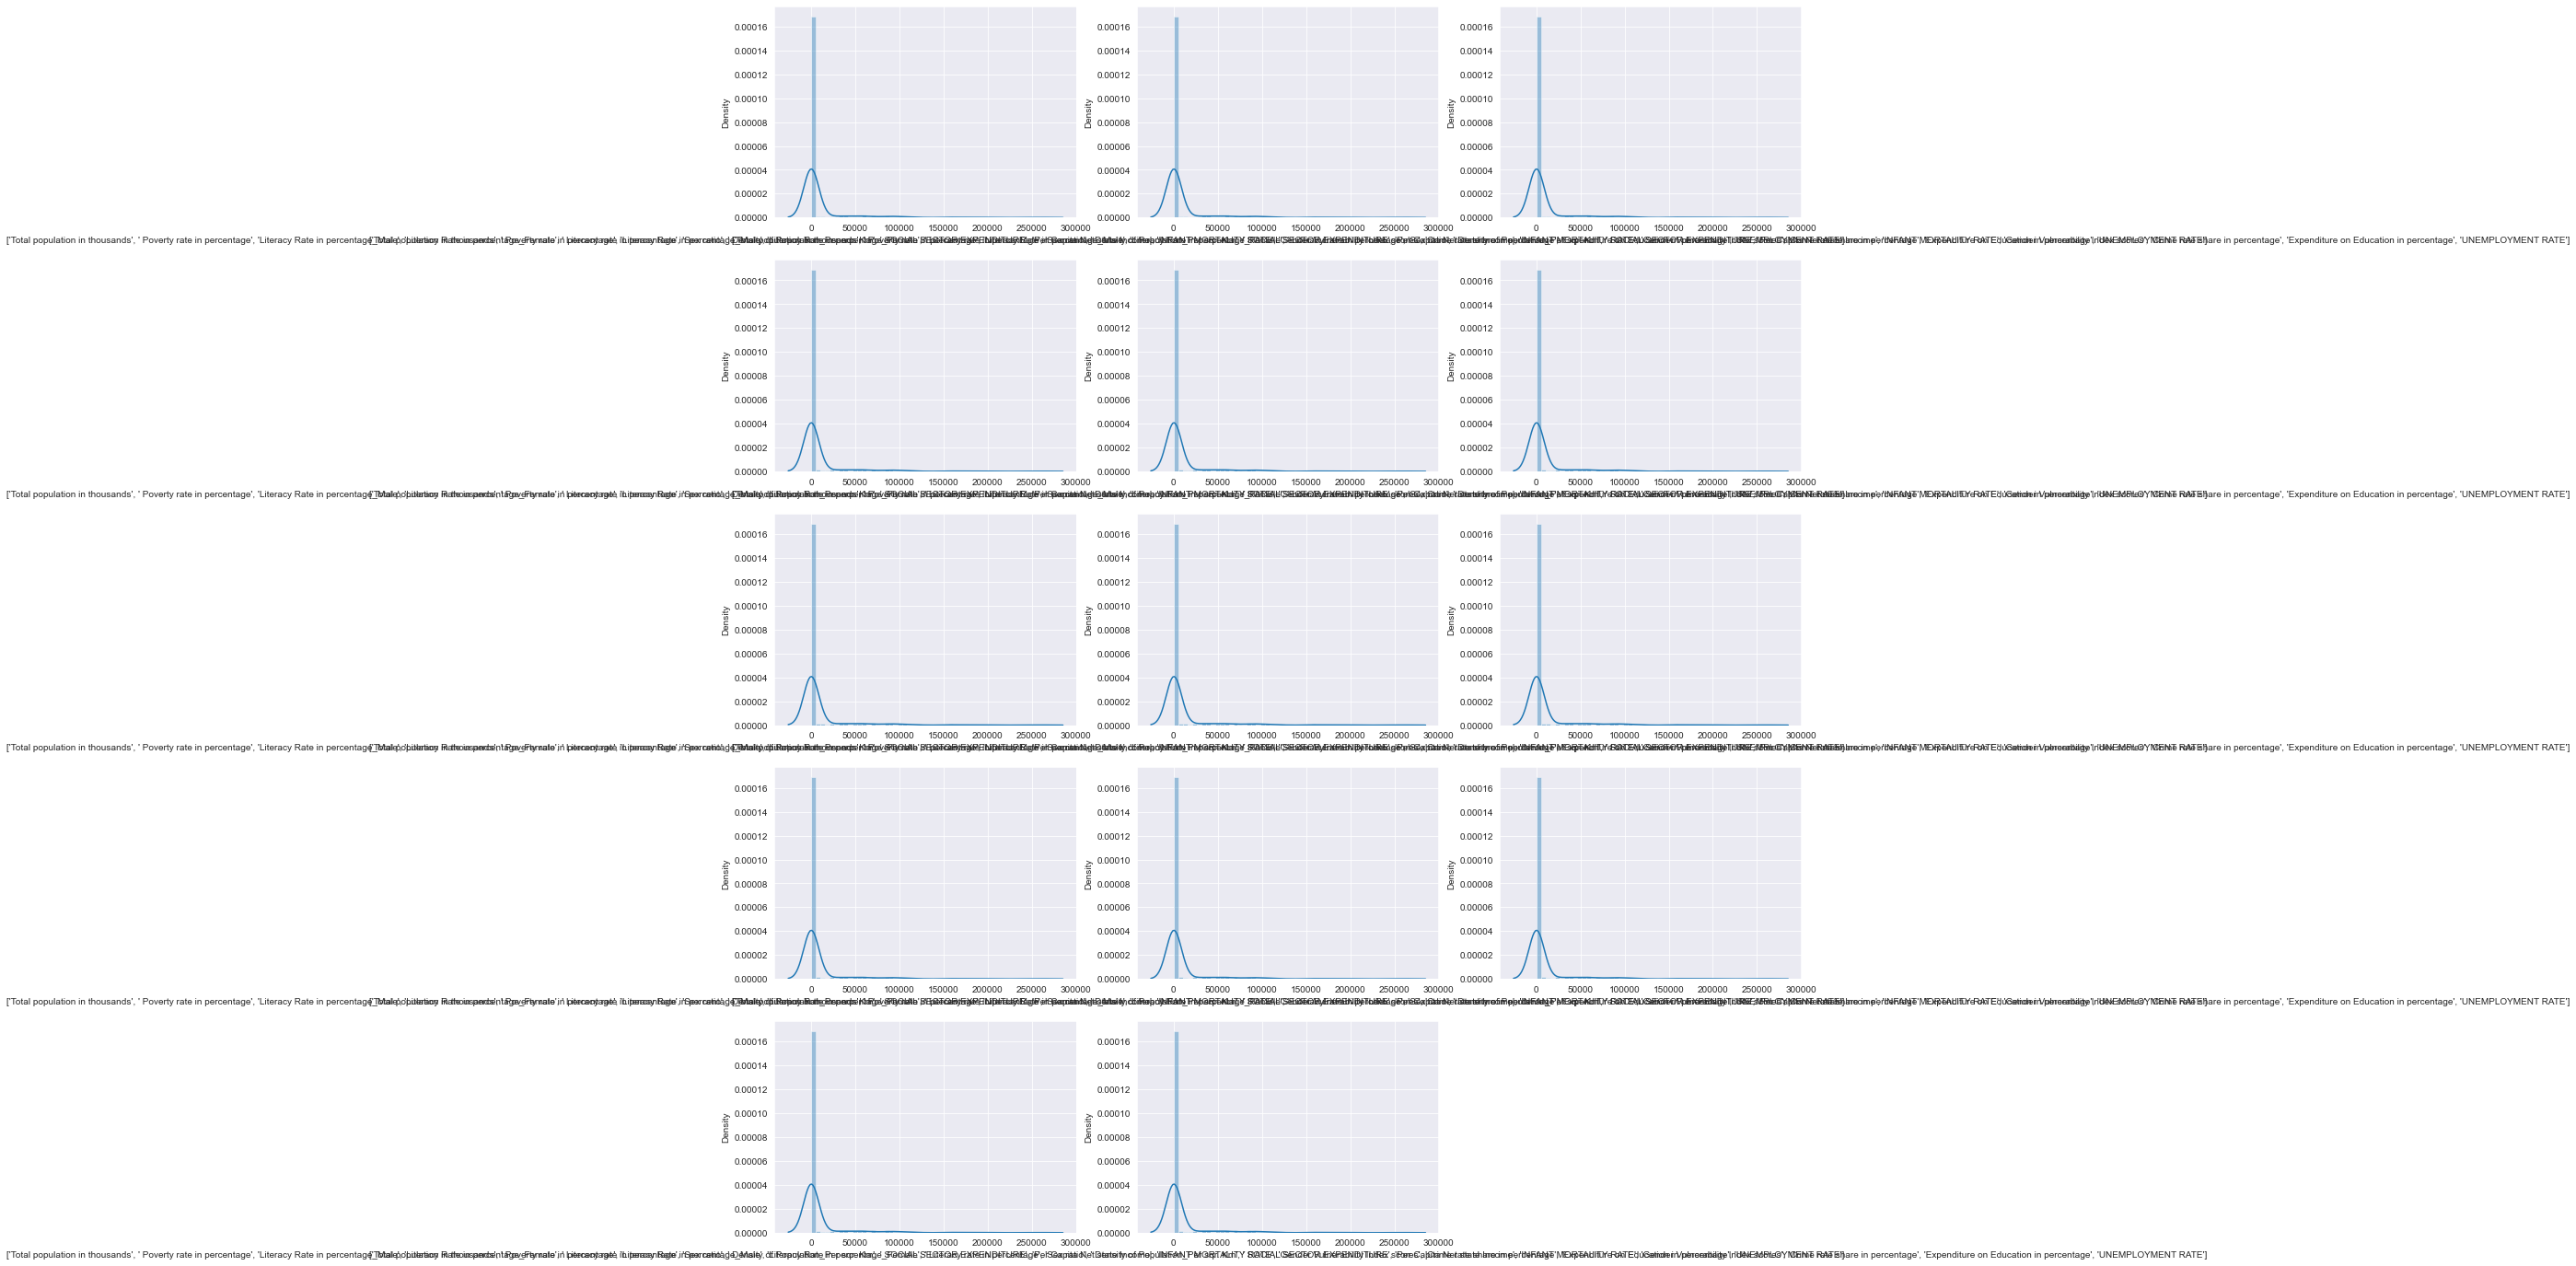

In [58]:
# distribution of numeric_col
plt.figure(figsize=(20,60), facecolor='white')
plotnumber=1
for i in numeric_col:
    ax=plt.subplot(12,3,plotnumber)
    sns.distplot(df[numeric_col])
    plt.xlabel(numeric_col)
    plotnumber+=1
plt.show()

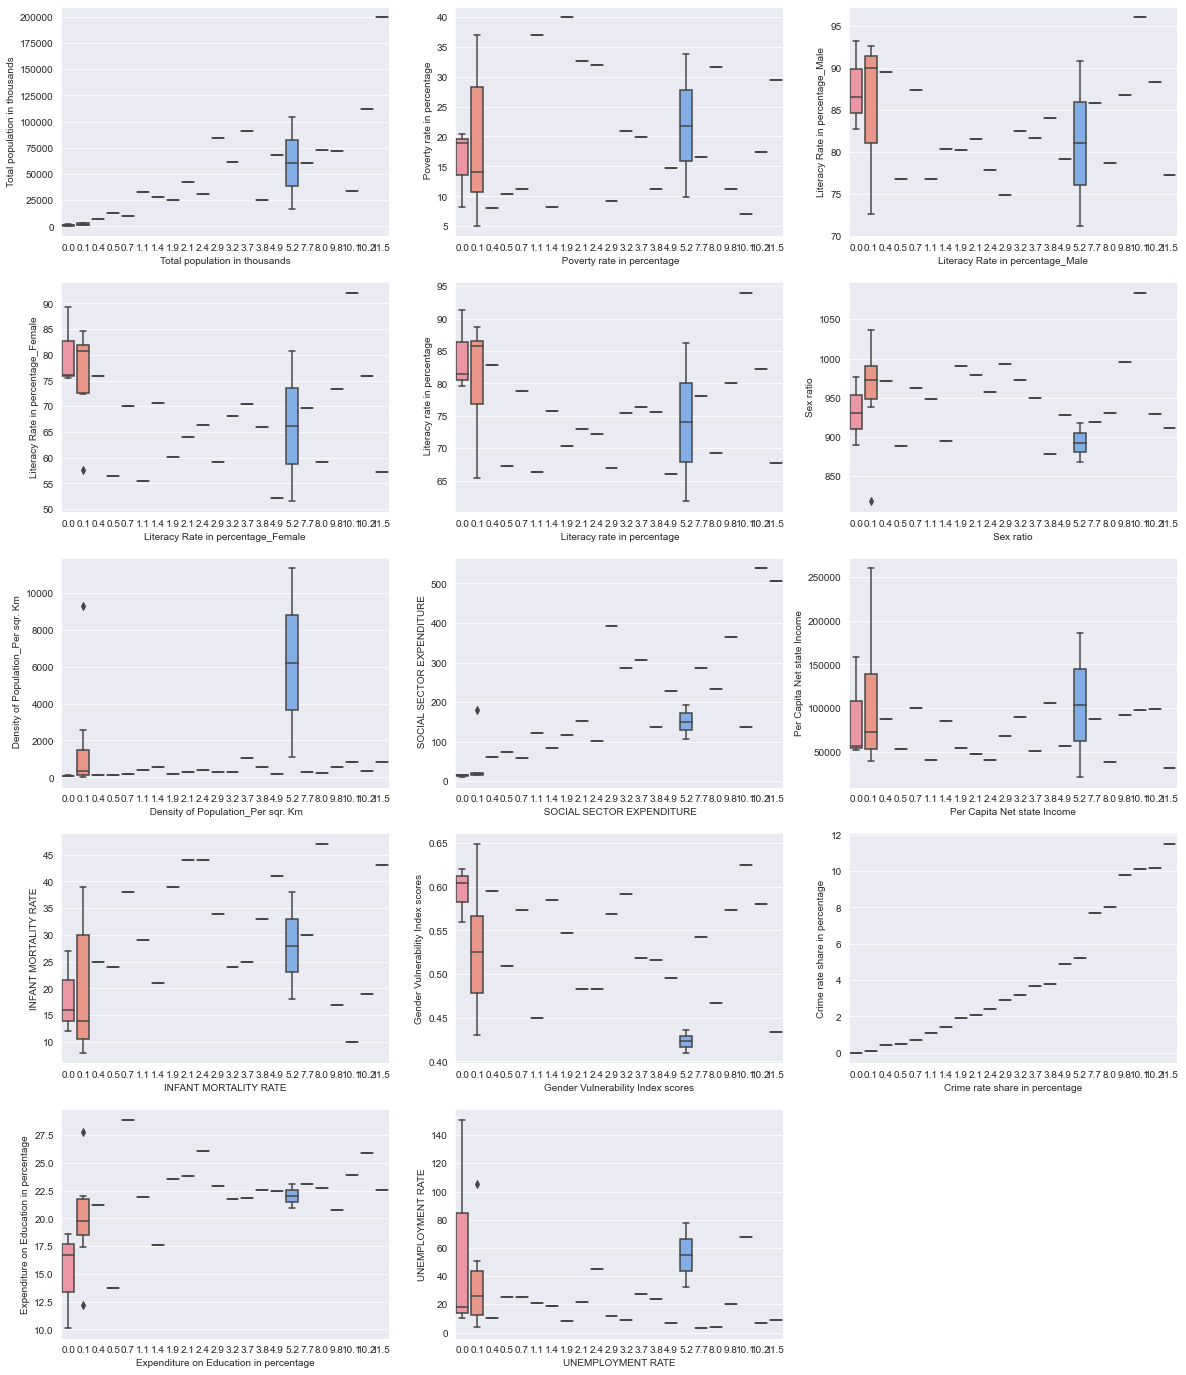

In [61]:
# boxplot to show target  distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber=1
for feature in numeric_col:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(x="Crime rate share in percentage", y=df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

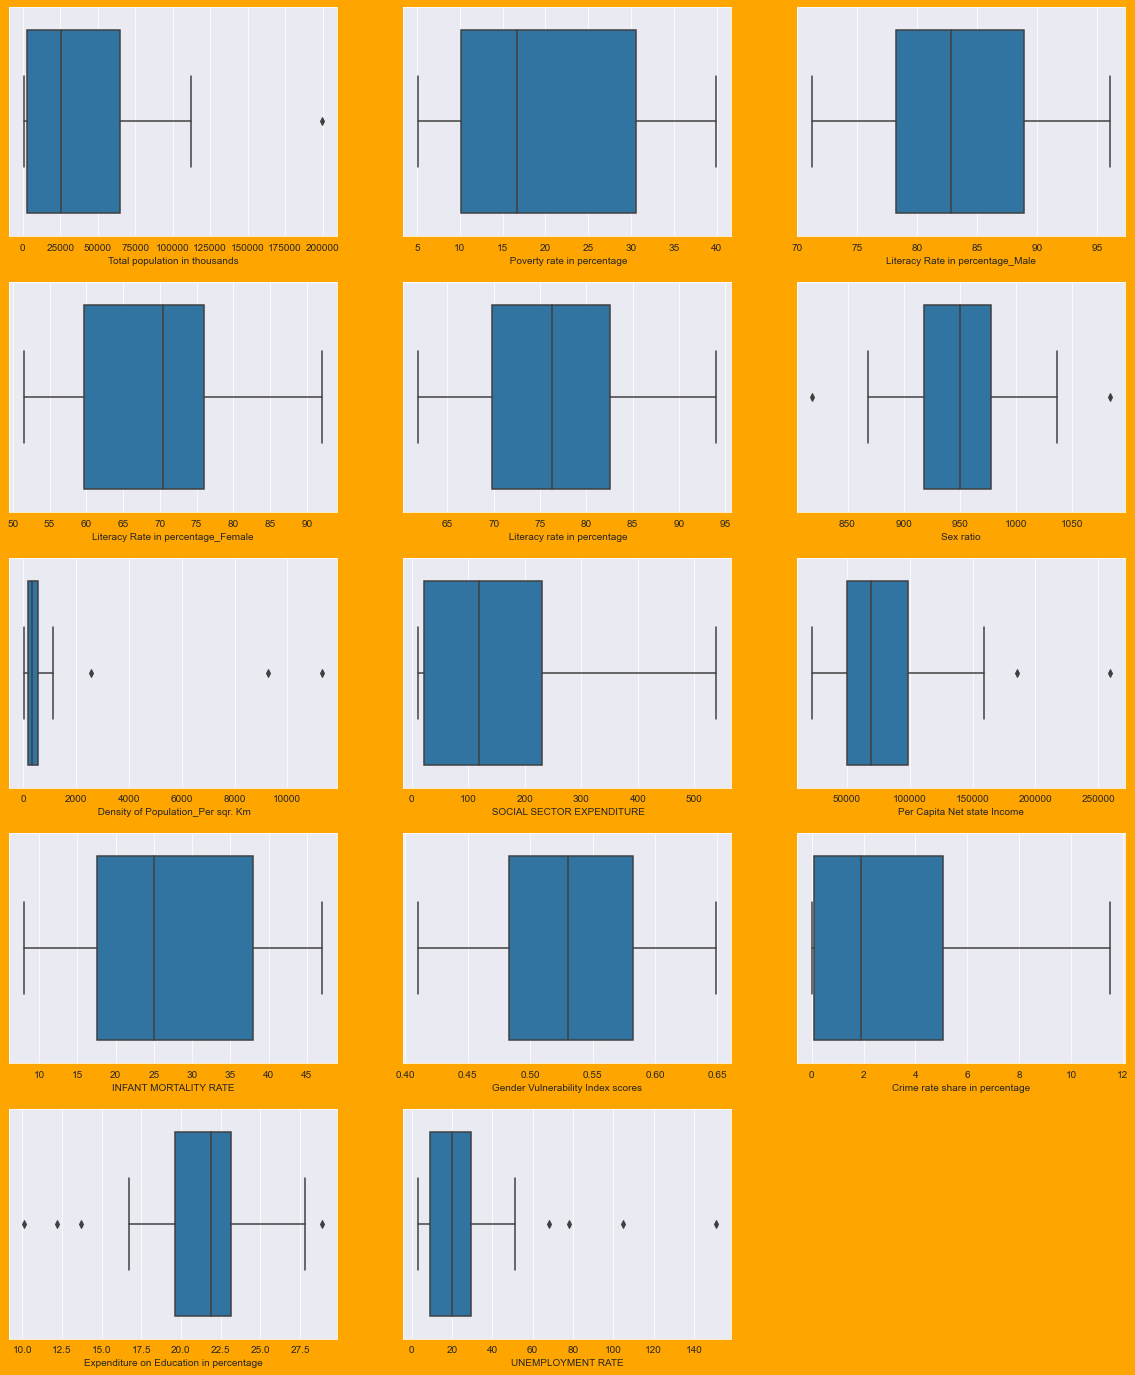

In [63]:
# outliers in numerical features
plt.figure(figsize=(20,60), facecolor='orange')
plotnumber=1
for i in numeric_col:
    ax=plt.subplot(12,3, plotnumber)
    sns.boxplot(df[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

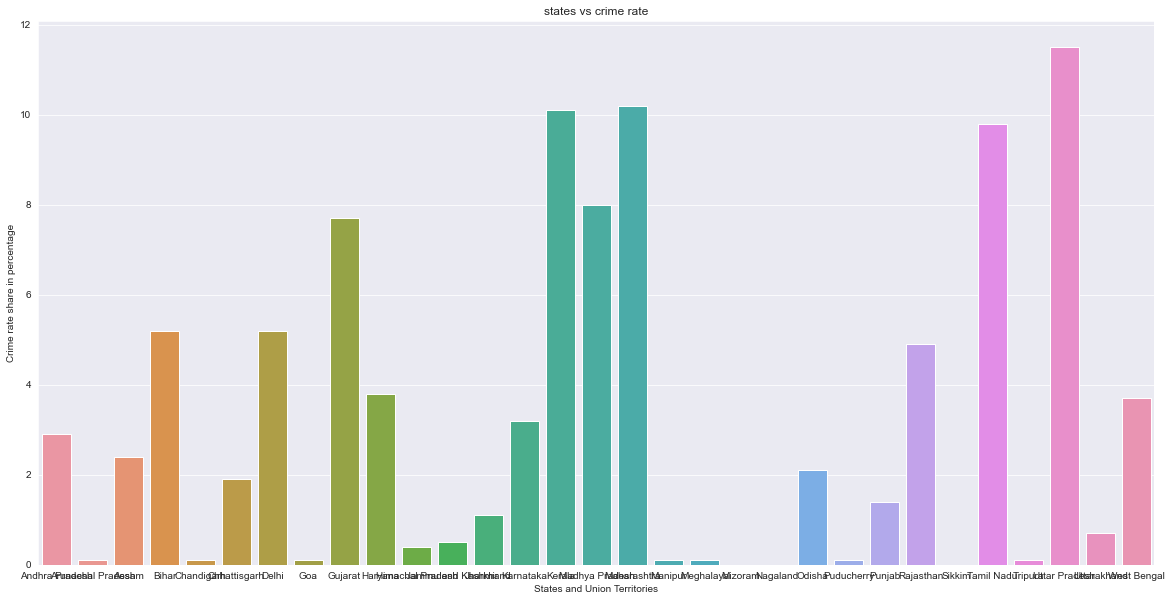

In [75]:
plt.figure(figsize=(20,10))
sns.barplot(x='States and Union Territories', y='Crime rate share in percentage', data=df)
plt.title('states vs crime rate')
plt.show()

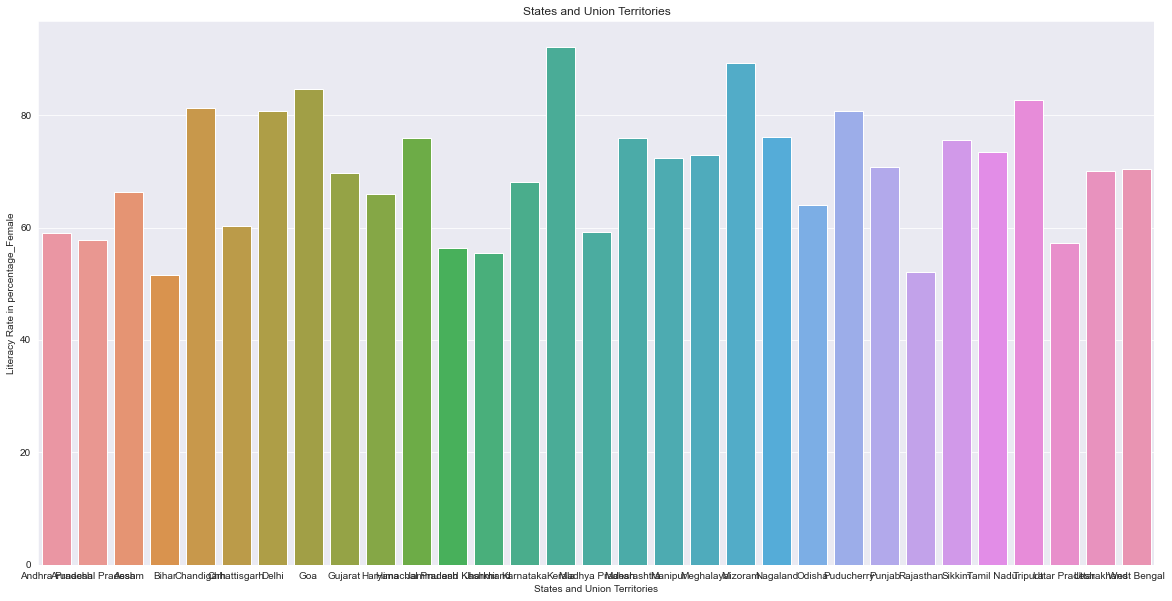

In [83]:
# State vs Literacy rate female
plt.figure(figsize=(20,10))
sns.barplot(x='States and Union Territories', y='Literacy Rate in percentage_Female', data=df)
plt.title('States and Union Territories')
plt.show()

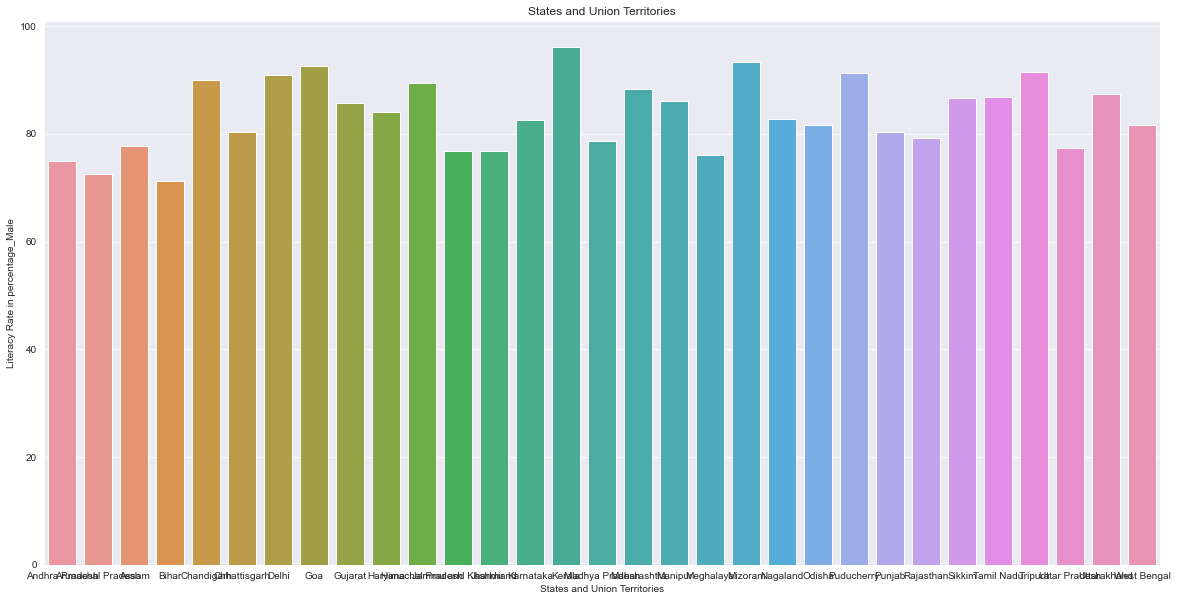

In [84]:
# State vs Literacy rate male
plt.figure(figsize=(20,10))
sns.barplot(x='States and Union Territories', y='Literacy Rate in percentage_Male', data=df)
plt.title('States and Union Territories')
plt.show()

In [89]:
#Crime Rate based on States
su_cr=df.groupby('States and Union Territories')['Crime rate share in percentage'].value_counts()
su_cr

States and Union Territories  Crime rate share in percentage
Andhra Pradesh                2.9                               1
Arunachal Pradesh             0.1                               1
Assam                         2.4                               1
Bihar                         5.2                               1
Chandigarh                    0.1                               1
Chhattisgarh                  1.9                               1
Delhi                         5.2                               1
Goa                           0.1                               1
Gujarat                       7.7                               1
Haryana                       3.8                               1
Himachal Pradesh              0.4                               1
Jammu and Kashmir             0.5                               1
Jharkhand                     1.1                               1
Karnataka                     3.2                               1
Kerala         

Text(0, 0.5, '')

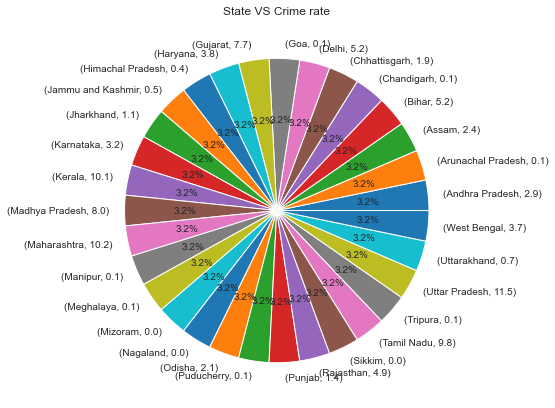

In [95]:
# State vs Crime Rate
su_cr.plot.pie(autopct='%1.1f%%')
plt.title('State VS Crime rate')
plt.ylabel('')

In [91]:
#Literacy rate of males based on states
su_lr=df.groupby('States and Union Territories')['Literacy Rate in percentage_Male'].value_counts()
su_lr

States and Union Territories  Literacy Rate in percentage_Male
Andhra Pradesh                74.9                                1
Arunachal Pradesh             72.6                                1
Assam                         77.8                                1
Bihar                         71.2                                1
Chandigarh                    90.0                                1
Chhattisgarh                  80.3                                1
Delhi                         90.9                                1
Goa                           92.6                                1
Gujarat                       85.8                                1
Haryana                       84.1                                1
Himachal Pradesh              89.5                                1
Jammu and Kashmir             76.8                                1
Jharkhand                     76.8                                1
Karnataka                     82.5                   

Text(0, 0.5, '')

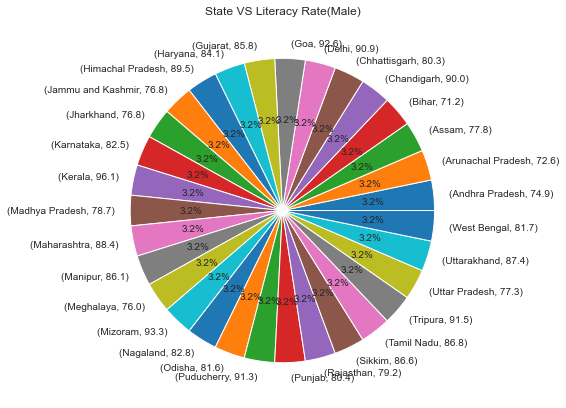

In [92]:
# States vs Literacy Rate(Males)
su_lr.plot.pie(autopct='%1.1f%%')
plt.title('State VS Literacy Rate(Male)')
plt.ylabel('')

In [93]:
#Literacy rate of females based on states
fu_lr=df.groupby('States and Union Territories')['Literacy Rate in percentage_Female'].value_counts()
fu_lr

States and Union Territories  Literacy Rate in percentage_Female
Andhra Pradesh                59.1                                  1
Arunachal Pradesh             57.7                                  1
Assam                         66.3                                  1
Bihar                         51.5                                  1
Chandigarh                    81.2                                  1
Chhattisgarh                  60.2                                  1
Delhi                         80.8                                  1
Goa                           84.7                                  1
Gujarat                       69.7                                  1
Haryana                       65.9                                  1
Himachal Pradesh              75.9                                  1
Jammu and Kashmir             56.4                                  1
Jharkhand                     55.4                                  1
Karnataka                

Text(0, 0.5, '')

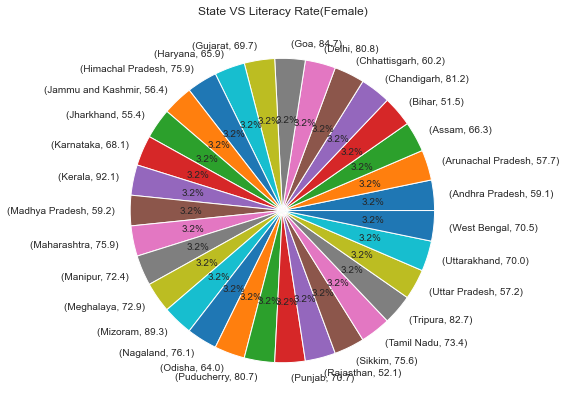

In [94]:
# States vs Literacy Rate(Females)
fu_lr.plot.pie(autopct='%1.1f%%')
plt.title('State VS Literacy Rate(Female)')
plt.ylabel('')

In [102]:
#Crime Rate based on States
sucr=df.groupby('States and Union Territories')['Crime rate share in percentage'].value_counts()
print(sucr)

States and Union Territories  Crime rate share in percentage
Andhra Pradesh                2.9                               1
Arunachal Pradesh             0.1                               1
Assam                         2.4                               1
Bihar                         5.2                               1
Chandigarh                    0.1                               1
Chhattisgarh                  1.9                               1
Delhi                         5.2                               1
Goa                           0.1                               1
Gujarat                       7.7                               1
Haryana                       3.8                               1
Himachal Pradesh              0.4                               1
Jammu and Kashmir             0.5                               1
Jharkhand                     1.1                               1
Karnataka                     3.2                               1
Kerala         